# üé≤ Transpilation Overview

**Quantum Transpilation** is the transformation of a given virtual quantum circuit:

- to match the topology of a specific device
- to optimize the circuit for execution

Rivet Transpiler package provides a family of functions for efficient transpilation of quantum circuits.

### Transpilation Stages

1) **Init** - Unrolling custom instructions and converting the circuit to all 1 and 2 qubit gates.

2) **Layout** - Mapping circuit virtual qubits to backend physical qubits.

3) **Routing** - Inject SWAP gates to comply with the backend‚Äôs coupling map.

4) **Translation** - Translate to the target backend‚Äôs basis gate set.

5) **Optimization** - Main optimization loop to increase circuit quality.

6) **Scheduling** - Conversion to hardware-specific pulses.

In [1]:
# https://qiskit.org/documentation/apidoc/transpiler.html

### Transpile Functions

`transpile` - custom transpilation with possibility of using:

- different transpilation stacks
- custom PassManager
- dynamical decoupling
- transpiler options

`transpile_chain` - consistently transpile and "stitch" a chain of quantum circuits.

`transpile_right` - transpile an additional circuit to the right part of the existing circuit.

`transpile_left` - transpile an additional circuit to the left part of the existing circuit.

`transpile_and_compress` - transpile and "topologically compress" a circuit considering a coupling map of the selected backend.

# üé± Transpilation Examples

In [2]:
import qiskit

from qiskit_ibm_runtime.fake_provider import FakeLimaV2
from qiskit_ibm_runtime.fake_provider import FakeMontrealV2

In [3]:
# Rivet Transpiler Imports

%cd ..

# Transpile Functions

from rivet_transpiler import transpile
from rivet_transpiler import transpile_chain
from rivet_transpiler import transpile_right
from rivet_transpiler import transpile_left
from rivet_transpiler import transpile_and_compress
from rivet_transpiler import transpile_and_return_metrics

# Service Functions

from rivet_transpiler import get_full_map
from rivet_transpiler import get_ibm_cost
from rivet_transpiler import get_circuit_hash

from rivet_transpiler import get_cnot_circuit
from rivet_transpiler import get_litmus_circuit

/mnt/c/Users/mohor/Jupyter/Haiqu/transpiler/docs


### Litmus Circuit

**Litmus circuit** is a minimal quantum circuit which consists of:

- Parametrized RZ gate on each qubit (each parameter name matches the  index of the virtual qubit - to trace consequent permutations of qubits during layout and routing phases of transpilation).

- Circular CNOT gates (necessary to introduce SWAPs during transpilation to not fully connected topology).

In [4]:
QUBITS_COUNT = 3

litmus_circuit = get_litmus_circuit(QUBITS_COUNT, "Litmus")

litmus_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_0: ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
            ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê     ‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_1: ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
            ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ     ‚ñë    
Litmus_0_2: ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
            ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò        ‚ñë

### Backend

**Fake backend** is an Aer simulator with properties of a real backend:

- coupling map
- basis gates
- noise model

Fake backends are useful for testing the transpiler and performing noisy simulations of the system.

For minimal example we select 5-qubit fake backend with linear topology.

In [5]:
backend = FakeLimaV2()
# backend = FakeMontrealV2()

qiskit.visualization.plot_gate_map(backend)

### Qiskit Transpile

In [6]:
transpiled_circuit = qiskit.transpile(
    litmus_circuit, 
    backend,
    seed_transpiler=1234,
    initial_layout=[0, 1, 2]
    # initial_layout=[0, 2, 4]
)

transpiled_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê               ‚îå‚îÄ‚îÄ‚îÄ‚îê             ‚ñë    
Litmus_0_0 -> 0 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ         ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ          ‚ñë    
                ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê     ‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_1 -> 1 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_2 -> 2 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò                       ‚ñë    
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                      
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

### Pass Manager

**Pass Manager** is an internal Qiskit object constructed by the `transpile` function "under the hood" during transpilation.

Pass Manager consists of Passes which analyse or change the transpiled circuit.

Calling `pass_manager.run` is equivalent to calling `transpile` and passing a circuit, backend and corresponding transpilation parameters.

In [7]:
# https://docs.quantum.ibm.com/api/qiskit/passmanager

In [8]:
pass_manager = qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager(
    
    optimization_level=3,
    backend=backend,
    # initial_layout=[1, 0, 2],
    seed_transpiler=1234
)

In [9]:
pass_manager.stages

('init', 'layout', 'routing', 'translation', 'optimization', 'scheduling')

In [10]:
# pass_manager.draw()

In [11]:
# pass_manager.init.draw()

In [12]:
# pass_manager.routing.draw()

In [13]:
# pass_manager.optimization.draw()

In [14]:
# pass_manager.layout.passes()

In [15]:
transpiled_litmus_circuit = pass_manager.run(litmus_circuit)

transpiled_litmus_circuit.draw(fold=-1)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                      
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

## Circuit Stitching

**Task:** to "stitch" together transpiled circuits into a chain.

Disconnected qubits are routed closer using SWAPs gates ‚Äì **but not routed back** to avoid additional SWAPs ‚Äì therefore allocation of virtual qubit changes.

We need to know the final allocation of qubits after transpilation.

Unfortunately, Qiskit does not provide such allocation.

Instead - Qiskit transpiled circuit contains ‚Äòlayout‚Äô property with data on applied qubit permutations:

- ‚Äòinitial_layout‚Äô ‚Äì initial placement of incoming virtual qubits during Layout stage.

- ‚Äòfinal_layout‚Äô ‚Äì placement of outgoing virtual qubits during Routing stage.

Function `get_full_map` follows above permutations to return final allocation of qubits after transpilation.

In [16]:
get_full_map(transpiled_litmus_circuit)

[0, 2, 1, 3, 4]

To find final allocation of qubits after transpilation we work with 3 sets of qubits:

- Incoming virtual qubits of the initial circuit
- Outgoing virtual qubits of the transpiled circuit
- Physical qubits of the selected backend

Example of qubit allocation during transpilation:

- `Zero Map` - Ancillas added
- `After Layout` - Initial layout applied 
- `After Routing` - SWAPs applied 
- `Full Map` - Final qubit allocation 

![image.png](../images/Fig1_circuit_stitching.jpg)

In [17]:
transpiled_litmus_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                      
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

### Our Transpile

Interface of `transpile` function matches `qiskit.transpile` - but allows additional parameters like:

- pre-defined transpilation stacks
- custom PassManager
- dynamical decoupling
- transpiler options

In [18]:
transpiled_circuit = transpile(
    litmus_circuit, 
    backend,
    seed_transpiler=1234,
    # initial_layout=[0, 1, 2]
    # initial_layout=[0, 2, 4]
)

transpiled_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                      
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

Final qubit allocation after transpilation:

In [19]:
get_full_map(transpiled_circuit)

[0, 2, 1, 3, 4]

### Transpile Chain

Consistently transpile and "stitch" a chain of quantum circuits.

In [20]:
CHAIN = [litmus_circuit] * 5

transpiled_chain_circuit = transpile_chain(
    CHAIN, 
    backend,
    seed_transpiler=1234,
    initial_layout=[0, 1, 2]
    # initial_layout=[0, 2, 4]
)

transpiled_chain_circuit.draw(fold=-1)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê               ‚îå‚îÄ‚îÄ‚îÄ‚îê             ‚ñë    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê                            ‚ñë    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê             ‚ñë    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê             ‚ñë    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê             ‚ñë    
Litmus_0_1 -> 0 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_1) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_1) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_1) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ         ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ          ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò                 ‚îÇ          ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ       ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ          ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ       ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ          ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ       ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ          ‚ñë    
                ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê     ‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê        ‚ñë    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê        ‚ñë    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê        ‚ñë    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê        ‚ñë    
Litmus_0_2 -> 1 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_2) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_2) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(Litmus_2) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚î¨‚îÄ‚îò  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ     ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ     ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ     ‚

In [21]:
get_full_map(transpiled_chain_circuit)

[2, 0, 1, 3, 4]

### Transpile Right

Transpile additional circuit to the right part of existing circuit.

In [22]:
transpiled_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                      
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

In [23]:
cnot_circuit = get_cnot_circuit(QUBITS_COUNT, "CNOT", [0, 1])

cnot_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      CNOT 
CNOT_0_0: ‚î§ Rz(CNOT_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
          ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê  ‚ñë   
CNOT_0_1: ‚î§ Rz(CNOT_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
          ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚ñë   
CNOT_0_2: ‚î§ Rz(CNOT_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
          ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò       ‚ñë

In [24]:
transpiled_right_circuit = transpile_right(
    central_circuit=transpiled_circuit,
    right_circuit=cnot_circuit,
    backend=backend,
    seed_transpiler=1234
)

transpiled_right_circuit.draw(fold=-1)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                     CNOT 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_0) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê  ‚ñë   
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_2) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚ñë   
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_1) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò            ‚ñë   
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                                                              
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

In [25]:
transpiled_right_circuit = transpile_right(
    central_circuit=transpiled_right_circuit,
    right_circuit=cnot_circuit,
    backend=backend,
    seed_transpiler=1234,
)

transpiled_right_circuit.draw(fold=-1)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                     CNOT ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      CNOT 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_0) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê  ‚ñë   ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê  ‚ñë   
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_2) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚ñë   ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚îÄ‚îÄ‚îò  ‚ñë   
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_1) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚î§ Rz(CNOT_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò            ‚ñë   ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò       ‚ñë   
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                                                                                       
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

### Transpile Left

Transpile additional circuit to the left part of existing circuit.

In [26]:
transpiled_left_circuit = transpile_left(
    central_circuit=transpiled_circuit,
    left_circuit=cnot_circuit,
    backend=backend,
    seed_transpiler=1234
)

transpiled_left_circuit.draw(fold=-1)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
 CNOT_0_2 -> 0 ‚î§ Rz(1.0*CNOT_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
               ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§      ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
 CNOT_0_0 -> 1 ‚î§ Rz(1.0*CNOT_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
               ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
 CNOT_0_1 -> 2 ‚î§ Rz(1.0*CNOT_1) ‚îú‚î§ X ‚îú‚îÄ‚ñë‚îÄ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
               ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    
ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                                               
ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

In [27]:
transpiled_left_circuit = transpile_left(
    central_circuit=transpiled_left_circuit,
    left_circuit=litmus_circuit,
    backend=backend,
    seed_transpiler=1234
)

transpiled_left_circuit.draw(fold=-1)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê                     ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 0 ‚î§ Rz(1.0*Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ Rz(1.0*CNOT_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§      ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_1 -> 1 ‚î§ Rz(1.0*Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚ñë‚îÄ‚î§ Rz(1.0*CNOT_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚î¨‚îÄ‚îò     ‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
Litmus_0_0 -> 2 ‚î§ Rz(1.0*Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ Rz(1.0*CNOT_1) ‚îú‚î§ X ‚îú‚îÄ‚ñë‚îÄ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò               ‚îî‚îÄ‚îÄ‚îÄ‚îò           ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                                                                                                     
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

### Transpile and Compress

`transpile_and_compress` allows to "topologically compress" a circuit - considering a coupling map of selected backend - to avoid using unnecessary ancilla qubits.

For demonstration - we take fake backend with more complicated topology:

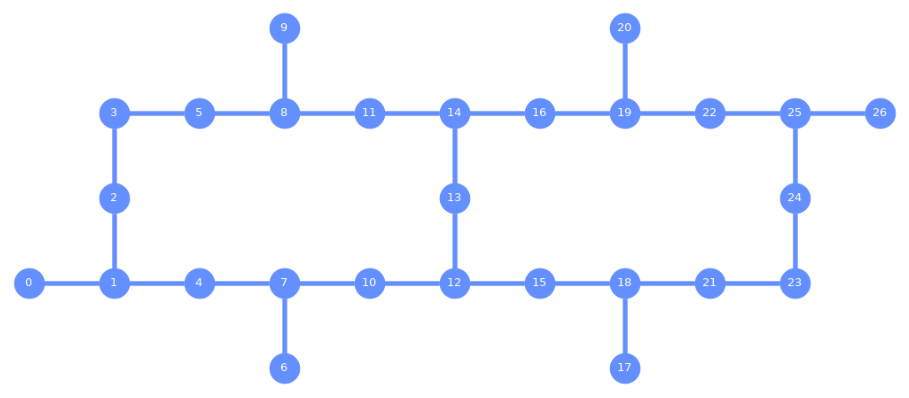

In [28]:
fake_montreal_backend = FakeMontrealV2()

qiskit.visualization.plot_gate_map(fake_montreal_backend)

In [29]:
transpiled_litmus_circuit = transpile(
    litmus_circuit, 
    fake_montreal_backend,
    optimization_level=3,
    routing_method='lookahead',
    seed_transpiler=1234
)

transpiled_litmus_circuit.draw(idle_wires=False)

‚îå‚îÄ‚îÄ‚îÄ‚îê                                 
 ancilla_13 -> 5 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                      ‚îå‚îÄ‚î¥‚îÄ‚îê      ‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê                            
 ancilla_14 -> 8 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                 ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò                       ‚ñë    
Litmus_0_1 -> 11 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                 ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò                 ‚îÇ          ‚ñë    
                 ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 13 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                 ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§  ‚îÇ  ‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 14 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                 ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò          ‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò        ‚ñë

In [30]:
compressed_circuit = transpile_and_compress(
    litmus_circuit, 
    backend=fake_montreal_backend,
    optimization_level=3,
    seed_transpiler=1234,
)

compressed_circuit.draw(idle_wires=False)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê                            ‚ñë    
Litmus_0_1 -> 11 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                 ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò                 ‚îÇ          ‚ñë    
                 ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê  ‚îÇ       ‚îå‚îÄ‚îÄ‚îÄ‚îê       ‚îÇ  ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 13 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                 ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 14 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                 ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò        ‚ñë

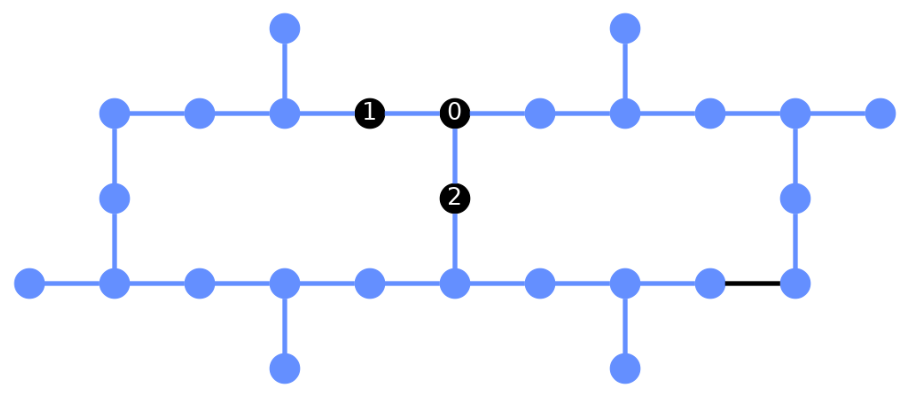

In [31]:
qiskit.visualization.plot_circuit_layout(compressed_circuit, fake_montreal_backend)

`transpile_and_compress` selects topologically most important qubits of a backend
to produce limited coupling map - to decrease transpilation and simulation time:



We use flexible measure of a node importance - node ‚Äúcloseness centrality‚Äù in the backend topology graph.

Closeness centrality is efficiently calculated using the ‚Äúrustworkx‚Äù graph library function: https://qiskit.org/ecosystem/rustworkx/dev/apiref/rustworkx.closeness_centrality.html

Flexible measure of node importance can be expanded with other metrics. 
For example, neighbors counts or qubit noise levels.

Once importances are calculated - we traverse topology graph using A-star search -
starting from the most important node.

Traversed nodes are added to limited qubit list which forms a connected subgraph.

Discovered subgraph is used to limit the backend topology during transpilation.

### Transpile and Return Metrics

`transpile_and_return_metrics` function transpiles circuit with given parameters and returns transpilation metrics.

In [32]:
transpiled_circuit, metrics = transpile_and_return_metrics(
    litmus_circuit, 
    backend=backend,
    optimization_level=3,
    seed_transpiler=1234
)

In [33]:
transpiled_circuit.draw(fold=-1, idle_wires=False)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë

In [34]:
metrics[0]

{'pass_index': 0,
 'pass_name': 'ContainsInstruction',
 'pass_type': 'Analysis',
 'time': 1.1682510375976562e-05,
 'depth': 5,
 'width': 3,
 'ibm_cost': 0.9498972910479807,
 'gates_counter': {1: 3, 2: 3}}

### Transpilation Stacks

Four pre-defined transpilation stacks have been added:

- Qiskit transpilation
- Pytket transpilation
- BQSKit QSearch synthesis
- BQSKit QFactor instantiation

#### Synthesis

**Quantum circuit synthesis** is the process of converting a mathematical description of a quantum transformation - often given as a unitary matrix - into a circuit composed of gates from a fixed gate set.

**Search-based** class of synthesis tools is categorized by the discrete search for a desired circuit through a space of circuits. These techniques are usually bottom-up, they start with an empty circuit and grow out as they search through the space.

![image.png](../images/Fig1_circuit_synthesis_schema.jpg)

[1] QFactor: A Domain-Specific Optimizer for Quantum Circuit Instantiation ‚Äì https://arxiv.org/pdf/2306.08152.pdf

#### QSearch

**QSearch** is a powerful search-based synthesis tool, which phrases the problem of circuit synthesis as a search over circuit structures combined with numerical optimization to instantiate circuit parameters.

1) The algorithm starts by placing single-qubit rotations on all qubits. 

2) The circuit is then instantiated by calling a numerical optimization subroutine to solve for the gate's parameters that minimize the distance between the circuit's unitary and the target unitary. 

3) After this, fixed building blocks composed of two-qubit gates followed by single-qubit rotations are placed on all pairs of qubits. 

This branching pattern forms the circuit tree, where at depth n in the tree, all possible circuit structures with n two-qudit gates exist. 

Each structure is a candidate solution is evaluated using the same numerical optimization process, and the order of evaluations is determined by A* search.

#### Stacks Usage

In [35]:
STACKS = ["qiskit",
          "qiskit_qsearch",
          "qiskit_qfactor_qsearch",
          "qiskit_pytket"]

#### Qiskit

In [36]:
transpiled_circuit = transpile(
    litmus_circuit,
    backend,
    stack="qiskit",
    seed_transpiler=1234)

transpiled_circuit.draw()    

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò        ‚ñë    
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                            ‚ñë    
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                      
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

#### Pytket

In [37]:
transpiled_circuit = transpile(
    litmus_circuit,
    backend,
    stack="qiskit_pytket",
    seed_transpiler=1234)

transpiled_circuit.draw()    

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê ‚ñë 
Litmus_0_2 -> 0 ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚ñë‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚î¨‚îÄ‚îò ‚ñë 
Litmus_0_0 -> 1 ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ X ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚ñë‚îÄ
                ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚î¨‚îÄ‚îò      ‚ñë 
Litmus_0_1 -> 2 ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò                          ‚ñë 
 ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                 
 ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

#### QSearch

In [38]:
# Bind Circuit Parameters

bound_litmus_circuit = litmus_circuit.copy()

for index, parameter in enumerate(litmus_circuit.parameters):
    
    bound_litmus_circuit.assign_parameters(
        {parameter: index}, 
        inplace=True)

In [39]:
transpiled_circuit = transpile(
    bound_litmus_circuit,
    backend,
    stack="qiskit_qsearch",
    qsearch_block_size=2,
    seed_transpiler=1234)

transpiled_circuit.draw(fold=-1)    

Frontier emptied.
Returning best known circuit with 0 layers and cost: 2.928933e-01.


global phase: 2.3559
                                                                           ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê   ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê  ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                                                                   ‚ñë 
      q_0 -> 0 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚î§ Rz(1.5708) ‚îú‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚î§ Rz(4.7117) ‚îú‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚î§ Rz(7.854) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ
               ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îê‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îê                                                                  ‚ñë 
      q_1 -> 1 ‚î§ Rz(2.0708) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(6.2832) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(13.637) ‚îú‚î§ X ‚îú‚î§ Rz(-1.5708) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-4.8475e-09) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-1.5708) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ
               ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îò‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îò‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚ñë 
      q_2 -> 2 ‚î§ Rz(8.854) ‚îú‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚î§ Rz(2œÄ) ‚îú‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚î§ Rz(13.137) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚î§ Rz(-2.6081) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-0.00024523) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-1.038) ‚îú‚îÄ‚ñë‚îÄ
               ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                                                  ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚ñë 
ancilla_0 -> 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                                                                                                                                                                                                           
ancilla_1 -> 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

#### QFactor + QSearch

In [40]:
transpiled_circuit = transpile(
    bound_litmus_circuit,
    backend,
    stack="qiskit_qfactor_qsearch",
    qsearch_block_size=2,
    seed_transpiler=1234)

transpiled_circuit.draw(fold=-1)   

Frontier emptied.
Returning best known circuit with 0 layers and cost: 3.507238e-01.


global phase: 3.7614
                                                                                 ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê              ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                                                       
      q_0 -> 0 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(-1œÄ/2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(2.299) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ Rz(-0.97561) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-0.84364) ‚îú‚î§ ‚àöX ‚îú‚îÄ‚î§ Rz(-2.9639) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
               ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îò‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îò‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îò‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îò‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îê                                                      
      q_1 -> 1 ‚î§ Rz(0.54911) ‚îú‚î§ ‚àöX ‚îú‚îÄ‚î§ Rz(6.2832) ‚îú‚î§ ‚àöX ‚îú‚îÄ‚î§ Rz(14.33) ‚îú‚îÄ‚î§ X ‚îú‚î§ Rz(3.0964) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚î§ Rz(-1.5708) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚î§ Rz(0) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚î§ Rz(œÄ) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚î§ Rz(-1.5708) ‚îú‚îÄ‚î§ ‚àöX ‚îú‚î§ Rz(-0.045233) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
               ‚îî‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò   ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò   ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò   ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
      q_2 -> 2 ‚îÄ‚î§ Rz(-2.984) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-2.8914) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-2.6169) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚î§ Rz(œÄ/2) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-2.442) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(5œÄ/2) ‚îú
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                                                                                                                       ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

### Circuit Hash

Function `get_circuit_hash` calculates SHA256 hash for a given quantum circuit.

Hash is based on properties of circuit gates:

- Instruction class (RX, CNOT, CRZ, etc.)
- Parameter values (angles)
- Used qubits
- Used classical bits

Parameter names are ignored - circuits with not-bound RZ("theta_1") and RZ("theta_2") will have equal hashes.

Inspired by Qiskit `soft_compare` gate function:

https://github.com/Qiskit/qiskit/blob/main/qiskit/circuit/instruction.py#L227

In [41]:
get_circuit_hash(litmus_circuit)

100095598721707543281749465799569900477058582496083003953231518177511314776532

In [42]:
get_circuit_hash(transpiled_circuit)

14933620835672132361461908286984305468315039130020404471380212166601340597543

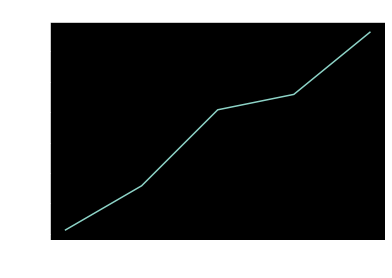

### IBM Cost

IBM Cost is a product of gate fidelities (F) and depth penalization (K):

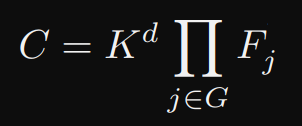

* K - circuit depth penalization factor
* d - circuit depth
* G - gates
* F - fidelities

IBM Cost can be used as circuit quality metric.

[1] ‚ÄúDemonstration of quantum volume 64 on a superconducting quantum computing system‚Äù ‚Äì IBMQ ‚Äì P. Jurcevic, A. Javadi-Abhari, L. S. Bishop and others ‚Äì https://arxiv.org/abs/2008.08571

In [43]:
litmus_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê          ‚îå‚îÄ‚îÄ‚îÄ‚îê Litmus 
Litmus_0_0: ‚î§ Rz(Litmus_0) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
            ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê     ‚îî‚îÄ‚î¨‚îÄ‚îò   ‚ñë    
Litmus_0_1: ‚î§ Rz(Litmus_1) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
            ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îî‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê  ‚îÇ     ‚ñë    
Litmus_0_2: ‚î§ Rz(Litmus_2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ
            ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò     ‚îî‚îÄ‚îÄ‚îÄ‚îò        ‚ñë

In [44]:
get_ibm_cost(litmus_circuit)

0.9498972910479807

In [45]:
transpiled_circuit.draw(fold=-1)

global phase: 3.7614
                                                                                 ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê              ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                                                       
      q_0 -> 0 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(-1œÄ/2) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ Rz(2.299) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ Rz(-0.97561) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-0.84364) ‚îú‚î§ ‚àöX ‚îú‚îÄ‚î§ Rz(-2.9639) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
               ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îò‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îò‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îò‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îò‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îê                                                      
      q_1 -> 1 ‚î§ Rz(0.54911) ‚îú‚î§ ‚àöX ‚îú‚îÄ‚î§ Rz(6.2832) ‚îú‚î§ ‚àöX ‚îú‚îÄ‚î§ Rz(14.33) ‚îú‚îÄ‚î§ X ‚îú‚î§ Rz(3.0964) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚î§ Rz(-1.5708) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚îÄ‚îÄ‚îÄ‚î§ Rz(0) ‚îú‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚î§ Rz(œÄ) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚àöX ‚îú‚î§ Rz(-1.5708) ‚îú‚îÄ‚î§ ‚àöX ‚îú‚î§ Rz(-0.045233) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
               ‚îî‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò   ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò   ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò   ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
      q_2 -> 2 ‚îÄ‚î§ Rz(-2.984) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-2.8914) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-2.6169) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚î§ Rz(œÄ/2) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(-2.442) ‚îú‚î§ ‚àöX ‚îú‚î§ Rz(5œÄ/2) ‚îú
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                                                                                                                       ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

In [46]:
get_ibm_cost(transpiled_circuit)

0.8529603716177907